In [1]:
%matplotlib inline
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS, Isomap

from sklearn.decomposition import PCA, KernelPCA

import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from src.datasets.stl10 import STL10
from src.datasets.splitting import split_dataset

#from src.models import TopologicallyRegularizedAutoencoder

torch.manual_seed(42)

In [10]:
#COIL-specific:
# Download COIL-100 dataset if not already available

import requests
import tarfile
import os

path = 'http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-100/'
name = 'coil-100.tar.gz'
file_path = path+name

if not os.path.exists('../data/coil-100'):
    results = requests.get(file_path)
    with open(name, "wb") as code:
        code.write(results.content)

    images_zip = tarfile.open('coil_100.tar.gz', mode='r:gz')
    images_zip.extractall('../data')

In [14]:
#COIL-specific:
# Download COIL-100 dataset if not already available

import requests
import tarfile
import os

import zipfile 
import io

path = 'http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-100/'
name = 'coil-100.zip' 
file_path = path+name

if not os.path.exists('../data/coil-100'):
    results = requests.get(file_path)
    z = zipfile.ZipFile(io.BytesIO(results.content))
    z.extractall('../data')


'http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-100/coil-100.zip'

In [5]:
# Convert ppm files to png

import glob
import os

filelist = glob.glob('../data/coil-100/*.ppm')
for i, filename in enumerate(filelist):  
    split = filename[2:].split('.')
    prefix  = ''.join(split[:-1])
    new_file = '.'.join(['.', prefix,'png'])
    command = f'convert {filename} {new_file}' 
    os.system(command)
    print(f'Executing shell: {command}')
    #sys.exit()
    #im = mpimg.imread(filename)
    #im = imread(filename)
    #im = Image.open(filename)
    #print(im)
    #plt.imshow(im, cmap="hot")
    #plt.show()
    #feature_vectors.append(im.flatten())

<module 'matplotlib.cm' from '/home/mimoor/.local/share/virtualenvs/topologically-constrained-autoencoder-TrUlG6DW/lib/python3.6/site-packages/matplotlib/cm.py'>
Executing: convert ../data/coil-100/obj37__175.ppm ../data/coil-100/obj37__175.png
Executing: convert ../data/coil-100/obj76__125.ppm ../data/coil-100/obj76__125.png
Executing: convert ../data/coil-100/obj16__40.ppm ../data/coil-100/obj16__40.png
Executing: convert ../data/coil-100/obj31__35.ppm ../data/coil-100/obj31__35.png
Executing: convert ../data/coil-100/obj18__225.ppm ../data/coil-100/obj18__225.png
Executing: convert ../data/coil-100/obj59__275.ppm ../data/coil-100/obj59__275.png
Executing: convert ../data/coil-100/obj55__315.ppm ../data/coil-100/obj55__315.png
Executing: convert ../data/coil-100/obj14__345.ppm ../data/coil-100/obj14__345.png
Executing: convert ../data/coil-100/obj78__0.ppm ../data/coil-100/obj78__0.png
Executing: convert ../data/coil-100/obj60__95.ppm ../data/coil-100/obj60__95.png
Executing: convert

Executing: convert ../data/coil-100/obj96__210.ppm ../data/coil-100/obj96__210.png
Executing: convert ../data/coil-100/obj12__40.ppm ../data/coil-100/obj12__40.png
Executing: convert ../data/coil-100/obj44__120.ppm ../data/coil-100/obj44__120.png
Executing: convert ../data/coil-100/obj35__35.ppm ../data/coil-100/obj35__35.png
Executing: convert ../data/coil-100/obj69__85.ppm ../data/coil-100/obj69__85.png
Executing: convert ../data/coil-100/obj80__150.ppm ../data/coil-100/obj80__150.png
Executing: convert ../data/coil-100/obj91__290.ppm ../data/coil-100/obj91__290.png
Executing: convert ../data/coil-100/obj13__230.ppm ../data/coil-100/obj13__230.png
Executing: convert ../data/coil-100/obj81__20.ppm ../data/coil-100/obj81__20.png
Executing: convert ../data/coil-100/obj52__260.ppm ../data/coil-100/obj52__260.png
Executing: convert ../data/coil-100/obj5__105.ppm ../data/coil-100/obj5__105.png
Executing: convert ../data/coil-100/obj29__5.ppm ../data/coil-100/obj29__5.png
Executing: convert

Executing: convert ../data/coil-100/obj41__190.ppm ../data/coil-100/obj41__190.png
Executing: convert ../data/coil-100/obj11__200.ppm ../data/coil-100/obj11__200.png
Executing: convert ../data/coil-100/obj50__250.ppm ../data/coil-100/obj50__250.png
Executing: convert ../data/coil-100/obj7__135.ppm ../data/coil-100/obj7__135.png
Executing: convert ../data/coil-100/obj86__65.ppm ../data/coil-100/obj86__65.png
Executing: convert ../data/coil-100/obj49__110.ppm ../data/coil-100/obj49__110.png
Executing: convert ../data/coil-100/obj97__340.ppm ../data/coil-100/obj97__340.png
Executing: convert ../data/coil-100/obj27__210.ppm ../data/coil-100/obj27__210.png
Executing: convert ../data/coil-100/obj66__240.ppm ../data/coil-100/obj66__240.png
Executing: convert ../data/coil-100/obj19__280.ppm ../data/coil-100/obj19__280.png
Executing: convert ../data/coil-100/obj21__90.ppm ../data/coil-100/obj21__90.png
Executing: convert ../data/coil-100/obj77__180.ppm ../data/coil-100/obj77__180.png
Executing:

Executing: convert ../data/coil-100/obj56__20.ppm ../data/coil-100/obj56__20.png
Executing: convert ../data/coil-100/obj33__115.ppm ../data/coil-100/obj33__115.png
Executing: convert ../data/coil-100/obj71__55.ppm ../data/coil-100/obj71__55.png
Executing: convert ../data/coil-100/obj63__285.ppm ../data/coil-100/obj63__285.png
Executing: convert ../data/coil-100/obj10__325.ppm ../data/coil-100/obj10__325.png
Executing: convert ../data/coil-100/obj15__170.ppm ../data/coil-100/obj15__170.png
Executing: convert ../data/coil-100/obj54__120.ppm ../data/coil-100/obj54__120.png
Executing: convert ../data/coil-100/obj3__245.ppm ../data/coil-100/obj3__245.png
Executing: convert ../data/coil-100/obj77__310.ppm ../data/coil-100/obj77__310.png
Executing: convert ../data/coil-100/obj86__210.ppm ../data/coil-100/obj86__210.png
Executing: convert ../data/coil-100/obj36__340.ppm ../data/coil-100/obj36__340.png
Executing: convert ../data/coil-100/obj41__300.ppm ../data/coil-100/obj41__300.png
Executing:

Executing: convert ../data/coil-100/obj30__290.ppm ../data/coil-100/obj30__290.png
Executing: convert ../data/coil-100/obj21__150.ppm ../data/coil-100/obj21__150.png
Executing: convert ../data/coil-100/obj18__60.ppm ../data/coil-100/obj18__60.png
Executing: convert ../data/coil-100/obj60__100.ppm ../data/coil-100/obj60__100.png
Executing: convert ../data/coil-100/obj13__25.ppm ../data/coil-100/obj13__25.png
Executing: convert ../data/coil-100/obj34__50.ppm ../data/coil-100/obj34__50.png
Executing: convert ../data/coil-100/obj67__180.ppm ../data/coil-100/obj67__180.png
Executing: convert ../data/coil-100/obj2__315.ppm ../data/coil-100/obj2__315.png
Executing: convert ../data/coil-100/obj18__140.ppm ../data/coil-100/obj18__140.png
Executing: convert ../data/coil-100/obj59__110.ppm ../data/coil-100/obj59__110.png
Executing: convert ../data/coil-100/obj37__210.ppm ../data/coil-100/obj37__210.png
Executing: convert ../data/coil-100/obj87__340.ppm ../data/coil-100/obj87__340.png
Executing: c

Executing: convert ../data/coil-100/obj80__200.ppm ../data/coil-100/obj80__200.png
Executing: convert ../data/coil-100/obj30__350.ppm ../data/coil-100/obj30__350.png
Executing: convert ../data/coil-100/obj71__300.ppm ../data/coil-100/obj71__300.png
Executing: convert ../data/coil-100/obj82__120.ppm ../data/coil-100/obj82__120.png
Executing: convert ../data/coil-100/obj39__75.ppm ../data/coil-100/obj39__75.png
Executing: convert ../data/coil-100/obj11__240.ppm ../data/coil-100/obj11__240.png
Executing: convert ../data/coil-100/obj7__175.ppm ../data/coil-100/obj7__175.png
Executing: convert ../data/coil-100/obj50__210.ppm ../data/coil-100/obj50__210.png
Executing: convert ../data/coil-100/obj86__25.ppm ../data/coil-100/obj86__25.png
Executing: convert ../data/coil-100/obj13__10.ppm ../data/coil-100/obj13__10.png
Executing: convert ../data/coil-100/obj2__320.ppm ../data/coil-100/obj2__320.png
Executing: convert ../data/coil-100/obj34__65.ppm ../data/coil-100/obj34__65.png
Executing: conve

Executing: convert ../data/coil-100/obj9__90.ppm ../data/coil-100/obj9__90.png
Executing: convert ../data/coil-100/obj73__35.ppm ../data/coil-100/obj73__35.png
Executing: convert ../data/coil-100/obj4__305.ppm ../data/coil-100/obj4__305.png
Executing: convert ../data/coil-100/obj54__40.ppm ../data/coil-100/obj54__40.png
Executing: convert ../data/coil-100/obj61__190.ppm ../data/coil-100/obj61__190.png
Executing: convert ../data/coil-100/obj8__265.ppm ../data/coil-100/obj8__265.png
Executing: convert ../data/coil-100/obj70__250.ppm ../data/coil-100/obj70__250.png
Executing: convert ../data/coil-100/obj31__200.ppm ../data/coil-100/obj31__200.png
Executing: convert ../data/coil-100/obj42__0.ppm ../data/coil-100/obj42__0.png
Executing: convert ../data/coil-100/obj81__350.ppm ../data/coil-100/obj81__350.png
Executing: convert ../data/coil-100/obj84__105.ppm ../data/coil-100/obj84__105.png
Executing: convert ../data/coil-100/obj59__50.ppm ../data/coil-100/obj59__50.png
Executing: convert ../

Executing: convert ../data/coil-100/obj44__205.ppm ../data/coil-100/obj44__205.png
Executing: convert ../data/coil-100/obj17__65.ppm ../data/coil-100/obj17__65.png
Executing: convert ../data/coil-100/obj96__135.ppm ../data/coil-100/obj96__135.png
Executing: convert ../data/coil-100/obj14__195.ppm ../data/coil-100/obj14__195.png
Executing: convert ../data/coil-100/obj30__10.ppm ../data/coil-100/obj30__10.png
Executing: convert ../data/coil-100/obj54__0.ppm ../data/coil-100/obj54__0.png
Executing: convert ../data/coil-100/obj62__260.ppm ../data/coil-100/obj62__260.png
Executing: convert ../data/coil-100/obj23__230.ppm ../data/coil-100/obj23__230.png
Executing: convert ../data/coil-100/obj82__50.ppm ../data/coil-100/obj82__50.png
Executing: convert ../data/coil-100/obj36__45.ppm ../data/coil-100/obj36__45.png
Executing: convert ../data/coil-100/obj74__120.ppm ../data/coil-100/obj74__120.png
Executing: convert ../data/coil-100/obj35__170.ppm ../data/coil-100/obj35__170.png
Executing: conve

Executing: convert ../data/coil-100/obj32__315.ppm ../data/coil-100/obj32__315.png
Executing: convert ../data/coil-100/obj76__110.ppm ../data/coil-100/obj76__110.png
Executing: convert ../data/coil-100/obj16__75.ppm ../data/coil-100/obj16__75.png
Executing: convert ../data/coil-100/obj37__140.ppm ../data/coil-100/obj37__140.png
Executing: convert ../data/coil-100/obj59__240.ppm ../data/coil-100/obj59__240.png
Executing: convert ../data/coil-100/obj18__210.ppm ../data/coil-100/obj18__210.png
Executing: convert ../data/coil-100/obj55__320.ppm ../data/coil-100/obj55__320.png
Executing: convert ../data/coil-100/obj26__280.ppm ../data/coil-100/obj26__280.png
Executing: convert ../data/coil-100/obj48__180.ppm ../data/coil-100/obj48__180.png
Executing: convert ../data/coil-100/obj92__230.ppm ../data/coil-100/obj92__230.png
Executing: convert ../data/coil-100/obj63__330.ppm ../data/coil-100/obj63__330.png
Executing: convert ../data/coil-100/obj10__290.ppm ../data/coil-100/obj10__290.png
Execut

Executing: convert ../data/coil-100/obj29__240.ppm ../data/coil-100/obj29__240.png
Executing: convert ../data/coil-100/obj99__310.ppm ../data/coil-100/obj99__310.png
Executing: convert ../data/coil-100/obj68__210.ppm ../data/coil-100/obj68__210.png
Executing: convert ../data/coil-100/obj47__140.ppm ../data/coil-100/obj47__140.png
Executing: convert ../data/coil-100/obj38__180.ppm ../data/coil-100/obj38__180.png
Executing: convert ../data/coil-100/obj95__270.ppm ../data/coil-100/obj95__270.png
Executing: convert ../data/coil-100/obj25__320.ppm ../data/coil-100/obj25__320.png
Executing: convert ../data/coil-100/obj56__280.ppm ../data/coil-100/obj56__280.png
Executing: convert ../data/coil-100/obj61__125.ppm ../data/coil-100/obj61__125.png
Executing: convert ../data/coil-100/obj20__175.ppm ../data/coil-100/obj20__175.png
Executing: convert ../data/coil-100/obj2__60.ppm ../data/coil-100/obj2__60.png
Executing: convert ../data/coil-100/obj73__80.ppm ../data/coil-100/obj73__80.png
Executing:

Executing: convert ../data/coil-100/obj55__105.ppm ../data/coil-100/obj55__105.png
Executing: convert ../data/coil-100/obj2__260.ppm ../data/coil-100/obj2__260.png
Executing: convert ../data/coil-100/obj14__155.ppm ../data/coil-100/obj14__155.png
Executing: convert ../data/coil-100/obj91__175.ppm ../data/coil-100/obj91__175.png
Executing: convert ../data/coil-100/obj67__25.ppm ../data/coil-100/obj67__25.png
Executing: convert ../data/coil-100/obj52__185.ppm ../data/coil-100/obj52__185.png
Executing: convert ../data/coil-100/obj40__50.ppm ../data/coil-100/obj40__50.png
Executing: convert ../data/coil-100/obj43__245.ppm ../data/coil-100/obj43__245.png
Executing: convert ../data/coil-100/obj69__340.ppm ../data/coil-100/obj69__340.png
Executing: convert ../data/coil-100/obj98__240.ppm ../data/coil-100/obj98__240.png
Executing: convert ../data/coil-100/obj28__310.ppm ../data/coil-100/obj28__310.png
Executing: convert ../data/coil-100/obj36__85.ppm ../data/coil-100/obj36__85.png
Executing: c

Executing: convert ../data/coil-100/obj44__50.ppm ../data/coil-100/obj44__50.png
Executing: convert ../data/coil-100/obj19__110.ppm ../data/coil-100/obj19__110.png
Executing: convert ../data/coil-100/obj58__140.ppm ../data/coil-100/obj58__140.png
Executing: convert ../data/coil-100/obj36__240.ppm ../data/coil-100/obj36__240.png
Executing: convert ../data/coil-100/obj86__310.ppm ../data/coil-100/obj86__310.png
Executing: convert ../data/coil-100/obj77__210.ppm ../data/coil-100/obj77__210.png
Executing: convert ../data/coil-100/obj9__50.ppm ../data/coil-100/obj9__50.png
Executing: convert ../data/coil-100/obj49__280.ppm ../data/coil-100/obj49__280.png
Executing: convert ../data/coil-100/obj3__345.ppm ../data/coil-100/obj3__345.png
Executing: convert ../data/coil-100/obj27__180.ppm ../data/coil-100/obj27__180.png
Executing: convert ../data/coil-100/obj51__275.ppm ../data/coil-100/obj51__275.png
Executing: convert ../data/coil-100/obj6__110.ppm ../data/coil-100/obj6__110.png
Executing: con

Executing: convert ../data/coil-100/obj53__155.ppm ../data/coil-100/obj53__155.png
Executing: convert ../data/coil-100/obj17__350.ppm ../data/coil-100/obj17__350.png
Executing: convert ../data/coil-100/obj56__300.ppm ../data/coil-100/obj56__300.png
Executing: convert ../data/coil-100/obj88__150.ppm ../data/coil-100/obj88__150.png
Executing: convert ../data/coil-100/obj75__130.ppm ../data/coil-100/obj75__130.png
Executing: convert ../data/coil-100/obj26__55.ppm ../data/coil-100/obj26__55.png
Executing: convert ../data/coil-100/obj34__160.ppm ../data/coil-100/obj34__160.png
Executing: convert ../data/coil-100/obj99__290.ppm ../data/coil-100/obj99__290.png
Executing: convert ../data/coil-100/obj50__325.ppm ../data/coil-100/obj50__325.png
Executing: convert ../data/coil-100/obj23__285.ppm ../data/coil-100/obj23__285.png
Executing: convert ../data/coil-100/obj73__115.ppm ../data/coil-100/obj73__115.png
Executing: convert ../data/coil-100/obj46__70.ppm ../data/coil-100/obj46__70.png
Executin

Executing: convert ../data/coil-100/obj62__320.ppm ../data/coil-100/obj62__320.png
Executing: convert ../data/coil-100/obj11__280.ppm ../data/coil-100/obj11__280.png
Executing: convert ../data/coil-100/obj57__250.ppm ../data/coil-100/obj57__250.png
Executing: convert ../data/coil-100/obj16__200.ppm ../data/coil-100/obj16__200.png
Executing: convert ../data/coil-100/obj78__100.ppm ../data/coil-100/obj78__100.png
Executing: convert ../data/coil-100/obj37__0.ppm ../data/coil-100/obj37__0.png
Executing: convert ../data/coil-100/obj39__150.ppm ../data/coil-100/obj39__150.png
Executing: convert ../data/coil-100/obj46__190.ppm ../data/coil-100/obj46__190.png
Executing: convert ../data/coil-100/obj49__35.ppm ../data/coil-100/obj49__35.png
Executing: convert ../data/coil-100/obj85__160.ppm ../data/coil-100/obj85__160.png
Executing: convert ../data/coil-100/obj15__85.ppm ../data/coil-100/obj15__85.png
Executing: convert ../data/coil-100/obj28__290.ppm ../data/coil-100/obj28__290.png
Executing: c

Executing: convert ../data/coil-100/obj47__210.ppm ../data/coil-100/obj47__210.png
Executing: convert ../data/coil-100/obj68__140.ppm ../data/coil-100/obj68__140.png
Executing: convert ../data/coil-100/obj29__110.ppm ../data/coil-100/obj29__110.png
Executing: convert ../data/coil-100/obj98__20.ppm ../data/coil-100/obj98__20.png
Executing: convert ../data/coil-100/obj9__235.ppm ../data/coil-100/obj9__235.png
Executing: convert ../data/coil-100/obj71__200.ppm ../data/coil-100/obj71__200.png
Executing: convert ../data/coil-100/obj30__250.ppm ../data/coil-100/obj30__250.png
Executing: convert ../data/coil-100/obj80__300.ppm ../data/coil-100/obj80__300.png
Executing: convert ../data/coil-100/obj80__85.ppm ../data/coil-100/obj80__85.png
Executing: convert ../data/coil-100/obj63__65.ppm ../data/coil-100/obj63__65.png
Executing: convert ../data/coil-100/obj44__10.ppm ../data/coil-100/obj44__10.png
Executing: convert ../data/coil-100/obj21__190.ppm ../data/coil-100/obj21__190.png
Executing: con

Executing: convert ../data/coil-100/obj82__330.ppm ../data/coil-100/obj82__330.png
Executing: convert ../data/coil-100/obj32__260.ppm ../data/coil-100/obj32__260.png
Executing: convert ../data/coil-100/obj43__55.ppm ../data/coil-100/obj43__55.png
Executing: convert ../data/coil-100/obj1__5.ppm ../data/coil-100/obj1__5.png
Executing: convert ../data/coil-100/obj64__20.ppm ../data/coil-100/obj64__20.png
Executing: convert ../data/coil-100/obj38__90.ppm ../data/coil-100/obj38__90.png
Executing: convert ../data/coil-100/obj65__170.ppm ../data/coil-100/obj65__170.png
Executing: convert ../data/coil-100/obj48__10.ppm ../data/coil-100/obj48__10.png
Executing: convert ../data/coil-100/obj24__120.ppm ../data/coil-100/obj24__120.png
Executing: convert ../data/coil-100/obj46__340.ppm ../data/coil-100/obj46__340.png
Executing: convert ../data/coil-100/obj98__110.ppm ../data/coil-100/obj98__110.png
Executing: convert ../data/coil-100/obj62__75.ppm ../data/coil-100/obj62__75.png
Executing: convert .

Executing: convert ../data/coil-100/obj66__280.ppm ../data/coil-100/obj66__280.png
Executing: convert ../data/coil-100/obj15__320.ppm ../data/coil-100/obj15__320.png
Executing: convert ../data/coil-100/obj77__140.ppm ../data/coil-100/obj77__140.png
Executing: convert ../data/coil-100/obj36__110.ppm ../data/coil-100/obj36__110.png
Executing: convert ../data/coil-100/obj58__210.ppm ../data/coil-100/obj58__210.png
Executing: convert ../data/coil-100/obj19__240.ppm ../data/coil-100/obj19__240.png
Executing: convert ../data/coil-100/obj21__50.ppm ../data/coil-100/obj21__50.png
Executing: convert ../data/coil-100/obj6__0.ppm ../data/coil-100/obj6__0.png
Executing: convert ../data/coil-100/obj7__45.ppm ../data/coil-100/obj7__45.png
Executing: convert ../data/coil-100/obj31__190.ppm ../data/coil-100/obj31__190.png
Executing: convert ../data/coil-100/obj95__45.ppm ../data/coil-100/obj95__45.png
Executing: convert ../data/coil-100/obj61__200.ppm ../data/coil-100/obj61__200.png
Executing: convert

Executing: convert ../data/coil-100/obj55__220.ppm ../data/coil-100/obj55__220.png
Executing: convert ../data/coil-100/obj47__5.ppm ../data/coil-100/obj47__5.png
Executing: convert ../data/coil-100/obj14__270.ppm ../data/coil-100/obj14__270.png
Executing: convert ../data/coil-100/obj69__45.ppm ../data/coil-100/obj69__45.png
Executing: convert ../data/coil-100/obj87__110.ppm ../data/coil-100/obj87__110.png
Executing: convert ../data/coil-100/obj12__80.ppm ../data/coil-100/obj12__80.png
Executing: convert ../data/coil-100/obj18__310.ppm ../data/coil-100/obj18__310.png
Executing: convert ../data/coil-100/obj59__340.ppm ../data/coil-100/obj59__340.png
Executing: convert ../data/coil-100/obj32__215.ppm ../data/coil-100/obj32__215.png
Executing: convert ../data/coil-100/obj82__345.ppm ../data/coil-100/obj82__345.png
Executing: convert ../data/coil-100/obj73__245.ppm ../data/coil-100/obj73__245.png
Executing: convert ../data/coil-100/obj43__20.ppm ../data/coil-100/obj43__20.png
Executing: con

Executing: convert ../data/coil-100/obj100__165.ppm ../data/coil-100/obj100__165.png
Executing: convert ../data/coil-100/obj83__120.ppm ../data/coil-100/obj83__120.png
Executing: convert ../data/coil-100/obj29__75.ppm ../data/coil-100/obj29__75.png
Executing: convert ../data/coil-100/obj4__25.ppm ../data/coil-100/obj4__25.png
Executing: convert ../data/coil-100/obj94__70.ppm ../data/coil-100/obj94__70.png
Executing: convert ../data/coil-100/obj8__335.ppm ../data/coil-100/obj8__335.png
Executing: convert ../data/coil-100/obj70__300.ppm ../data/coil-100/obj70__300.png
Executing: convert ../data/coil-100/obj31__350.ppm ../data/coil-100/obj31__350.png
Executing: convert ../data/coil-100/obj81__200.ppm ../data/coil-100/obj81__200.png
Executing: convert ../data/coil-100/obj6__70.ppm ../data/coil-100/obj6__70.png
Executing: convert ../data/coil-100/obj12__160.ppm ../data/coil-100/obj12__160.png
Executing: convert ../data/coil-100/obj4__255.ppm ../data/coil-100/obj4__255.png
Executing: convert

Executing: convert ../data/coil-100/obj73__170.ppm ../data/coil-100/obj73__170.png
Executing: convert ../data/coil-100/obj32__120.ppm ../data/coil-100/obj32__120.png
Executing: convert ../data/coil-100/obj61__60.ppm ../data/coil-100/obj61__60.png
Executing: convert ../data/coil-100/obj76__325.ppm ../data/coil-100/obj76__325.png
Executing: convert ../data/coil-100/obj87__225.ppm ../data/coil-100/obj87__225.png
Executing: convert ../data/coil-100/obj14__145.ppm ../data/coil-100/obj14__145.png
Executing: convert ../data/coil-100/obj2__270.ppm ../data/coil-100/obj2__270.png
Executing: convert ../data/coil-100/obj55__115.ppm ../data/coil-100/obj55__115.png
Executing: convert ../data/coil-100/obj57__235.ppm ../data/coil-100/obj57__235.png
Executing: convert ../data/coil-100/obj16__265.ppm ../data/coil-100/obj16__265.png
Executing: convert ../data/coil-100/obj78__165.ppm ../data/coil-100/obj78__165.png
Executing: convert ../data/coil-100/obj39__135.ppm ../data/coil-100/obj39__135.png
Executin

Executing: convert ../data/coil-100/obj95__215.ppm ../data/coil-100/obj95__215.png
Executing: convert ../data/coil-100/obj1__180.ppm ../data/coil-100/obj1__180.png
Executing: convert ../data/coil-100/obj54__90.ppm ../data/coil-100/obj54__90.png
Executing: convert ../data/coil-100/obj61__140.ppm ../data/coil-100/obj61__140.png
Executing: convert ../data/coil-100/obj20__110.ppm ../data/coil-100/obj20__110.png
Executing: convert ../data/coil-100/obj70__280.ppm ../data/coil-100/obj70__280.png
Executing: convert ../data/coil-100/obj58__150.ppm ../data/coil-100/obj58__150.png
Executing: convert ../data/coil-100/obj19__100.ppm ../data/coil-100/obj19__100.png
Executing: convert ../data/coil-100/obj77__200.ppm ../data/coil-100/obj77__200.png
Executing: convert ../data/coil-100/obj36__250.ppm ../data/coil-100/obj36__250.png
Executing: convert ../data/coil-100/obj86__300.ppm ../data/coil-100/obj86__300.png
Executing: convert ../data/coil-100/obj9__40.ppm ../data/coil-100/obj9__40.png
Executing: c

Executing: convert ../data/coil-100/obj58__90.ppm ../data/coil-100/obj58__90.png
Executing: convert ../data/coil-100/obj91__110.ppm ../data/coil-100/obj91__110.png
Executing: convert ../data/coil-100/obj67__40.ppm ../data/coil-100/obj67__40.png
Executing: convert ../data/coil-100/obj5__285.ppm ../data/coil-100/obj5__285.png
Executing: convert ../data/coil-100/obj40__35.ppm ../data/coil-100/obj40__35.png
Executing: convert ../data/coil-100/obj43__220.ppm ../data/coil-100/obj43__220.png
Executing: convert ../data/coil-100/obj11__95.ppm ../data/coil-100/obj11__95.png
Executing: convert ../data/coil-100/obj69__325.ppm ../data/coil-100/obj69__325.png
Executing: convert ../data/coil-100/obj98__225.ppm ../data/coil-100/obj98__225.png
Executing: convert ../data/coil-100/obj74__185.ppm ../data/coil-100/obj74__185.png
Executing: convert ../data/coil-100/obj94__345.ppm ../data/coil-100/obj94__345.png
Executing: convert ../data/coil-100/obj24__215.ppm ../data/coil-100/obj24__215.png
Executing: con

Executing: convert ../data/coil-100/obj97__210.ppm ../data/coil-100/obj97__210.png
Executing: convert ../data/coil-100/obj27__340.ppm ../data/coil-100/obj27__340.png
Executing: convert ../data/coil-100/obj66__310.ppm ../data/coil-100/obj66__310.png
Executing: convert ../data/coil-100/obj28__25.ppm ../data/coil-100/obj28__25.png
Executing: convert ../data/coil-100/obj22__115.ppm ../data/coil-100/obj22__115.png
Executing: convert ../data/coil-100/obj63__145.ppm ../data/coil-100/obj63__145.png
Executing: convert ../data/coil-100/obj74__95.ppm ../data/coil-100/obj74__95.png
Executing: convert ../data/coil-100/obj5__75.ppm ../data/coil-100/obj5__75.png
Executing: convert ../data/coil-100/obj72__285.ppm ../data/coil-100/obj72__285.png
Executing: convert ../data/coil-100/obj97__75.ppm ../data/coil-100/obj97__75.png
Executing: convert ../data/coil-100/obj87__265.ppm ../data/coil-100/obj87__265.png
Executing: convert ../data/coil-100/obj37__335.ppm ../data/coil-100/obj37__335.png
Executing: con

Executing: convert ../data/coil-100/obj30__150.ppm ../data/coil-100/obj30__150.png
Executing: convert ../data/coil-100/obj9__135.ppm ../data/coil-100/obj9__135.png
Executing: convert ../data/coil-100/obj41__10.ppm ../data/coil-100/obj41__10.png
Executing: convert ../data/coil-100/obj88__95.ppm ../data/coil-100/obj88__95.png
Executing: convert ../data/coil-100/obj74__355.ppm ../data/coil-100/obj74__355.png
Executing: convert ../data/coil-100/obj35__305.ppm ../data/coil-100/obj35__305.png
Executing: convert ../data/coil-100/obj85__255.ppm ../data/coil-100/obj85__255.png
Executing: convert ../data/coil-100/obj89__335.ppm ../data/coil-100/obj89__335.png
Executing: convert ../data/coil-100/obj39__265.ppm ../data/coil-100/obj39__265.png
Executing: convert ../data/coil-100/obj78__235.ppm ../data/coil-100/obj78__235.png
Executing: convert ../data/coil-100/obj94__195.ppm ../data/coil-100/obj94__195.png
Executing: convert ../data/coil-100/obj16__135.ppm ../data/coil-100/obj16__135.png
Executing:

Executing: convert ../data/coil-100/obj44__185.ppm ../data/coil-100/obj44__185.png
Executing: convert ../data/coil-100/obj59__325.ppm ../data/coil-100/obj59__325.png
Executing: convert ../data/coil-100/obj82__320.ppm ../data/coil-100/obj82__320.png
Executing: convert ../data/coil-100/obj32__270.ppm ../data/coil-100/obj32__270.png
Executing: convert ../data/coil-100/obj73__220.ppm ../data/coil-100/obj73__220.png
Executing: convert ../data/coil-100/obj43__45.ppm ../data/coil-100/obj43__45.png
Executing: convert ../data/coil-100/obj38__80.ppm ../data/coil-100/obj38__80.png
Executing: convert ../data/coil-100/obj64__30.ppm ../data/coil-100/obj64__30.png
Executing: convert ../data/coil-100/obj75__270.ppm ../data/coil-100/obj75__270.png
Executing: convert ../data/coil-100/obj34__220.ppm ../data/coil-100/obj34__220.png
Executing: convert ../data/coil-100/obj23__15.ppm ../data/coil-100/obj23__15.png
Executing: convert ../data/coil-100/obj88__210.ppm ../data/coil-100/obj88__210.png
Executing: c

Executing: convert ../data/coil-100/obj10__165.ppm ../data/coil-100/obj10__165.png
Executing: convert ../data/coil-100/obj66__290.ppm ../data/coil-100/obj66__290.png
Executing: convert ../data/coil-100/obj15__330.ppm ../data/coil-100/obj15__330.png
Executing: convert ../data/coil-100/obj36__100.ppm ../data/coil-100/obj36__100.png
Executing: convert ../data/coil-100/obj77__150.ppm ../data/coil-100/obj77__150.png
Executing: convert ../data/coil-100/obj19__250.ppm ../data/coil-100/obj19__250.png
Executing: convert ../data/coil-100/obj21__40.ppm ../data/coil-100/obj21__40.png
Executing: convert ../data/coil-100/obj58__200.ppm ../data/coil-100/obj58__200.png
Executing: convert ../data/coil-100/obj52__345.ppm ../data/coil-100/obj52__345.png
Executing: convert ../data/coil-100/obj13__315.ppm ../data/coil-100/obj13__315.png
Executing: convert ../data/coil-100/obj30__125.ppm ../data/coil-100/obj30__125.png
Executing: convert ../data/coil-100/obj71__175.ppm ../data/coil-100/obj71__175.png
Execut

Executing: convert ../data/coil-100/obj14__260.ppm ../data/coil-100/obj14__260.png
Executing: convert ../data/coil-100/obj55__230.ppm ../data/coil-100/obj55__230.png
Executing: convert ../data/coil-100/obj2__155.ppm ../data/coil-100/obj2__155.png
Executing: convert ../data/coil-100/obj87__100.ppm ../data/coil-100/obj87__100.png
Executing: convert ../data/coil-100/obj69__55.ppm ../data/coil-100/obj69__55.png
Executing: convert ../data/coil-100/obj59__350.ppm ../data/coil-100/obj59__350.png
Executing: convert ../data/coil-100/obj12__90.ppm ../data/coil-100/obj12__90.png
Executing: convert ../data/coil-100/obj18__300.ppm ../data/coil-100/obj18__300.png
Executing: convert ../data/coil-100/obj73__255.ppm ../data/coil-100/obj73__255.png
Executing: convert ../data/coil-100/obj32__205.ppm ../data/coil-100/obj32__205.png
Executing: convert ../data/coil-100/obj82__355.ppm ../data/coil-100/obj82__355.png
Executing: convert ../data/coil-100/obj97__5.ppm ../data/coil-100/obj97__5.png
Executing: con

Executing: convert ../data/coil-100/obj69__95.ppm ../data/coil-100/obj69__95.png
Executing: convert ../data/coil-100/obj35__25.ppm ../data/coil-100/obj35__25.png
Executing: convert ../data/coil-100/obj56__45.ppm ../data/coil-100/obj56__45.png
Executing: convert ../data/coil-100/obj72__120.ppm ../data/coil-100/obj72__120.png
Executing: convert ../data/coil-100/obj33__170.ppm ../data/coil-100/obj33__170.png
Executing: convert ../data/coil-100/obj71__30.ppm ../data/coil-100/obj71__30.png
Executing: convert ../data/coil-100/obj62__5.ppm ../data/coil-100/obj62__5.png
Executing: convert ../data/coil-100/obj10__340.ppm ../data/coil-100/obj10__340.png
Executing: convert ../data/coil-100/obj51__310.ppm ../data/coil-100/obj51__310.png
Executing: convert ../data/coil-100/obj20__90.ppm ../data/coil-100/obj20__90.png
Executing: convert ../data/coil-100/obj15__115.ppm ../data/coil-100/obj15__115.png
Executing: convert ../data/coil-100/obj54__145.ppm ../data/coil-100/obj54__145.png
Executing: convert

Executing: convert ../data/coil-100/obj20__280.ppm ../data/coil-100/obj20__280.png
Executing: convert ../data/coil-100/obj53__320.ppm ../data/coil-100/obj53__320.png
Executing: convert ../data/coil-100/obj95__95.ppm ../data/coil-100/obj95__95.png
Executing: convert ../data/coil-100/obj49__100.ppm ../data/coil-100/obj49__100.png
Executing: convert ../data/coil-100/obj66__250.ppm ../data/coil-100/obj66__250.png
Executing: convert ../data/coil-100/obj97__350.ppm ../data/coil-100/obj97__350.png
Executing: convert ../data/coil-100/obj27__200.ppm ../data/coil-100/obj27__200.png
Executing: convert ../data/coil-100/obj19__290.ppm ../data/coil-100/obj19__290.png
Executing: convert ../data/coil-100/obj21__80.ppm ../data/coil-100/obj21__80.png
Executing: convert ../data/coil-100/obj77__190.ppm ../data/coil-100/obj77__190.png
Executing: convert ../data/coil-100/obj100__280.ppm ../data/coil-100/obj100__280.png
Executing: convert ../data/coil-100/obj40__235.ppm ../data/coil-100/obj40__235.png
Execut

Executing: convert ../data/coil-100/obj83__10.ppm ../data/coil-100/obj83__10.png
Executing: convert ../data/coil-100/obj19__60.ppm ../data/coil-100/obj19__60.png
Executing: convert ../data/coil-100/obj80__135.ppm ../data/coil-100/obj80__135.png
Executing: convert ../data/coil-100/obj13__255.ppm ../data/coil-100/obj13__255.png
Executing: convert ../data/coil-100/obj81__45.ppm ../data/coil-100/obj81__45.png
Executing: convert ../data/coil-100/obj52__205.ppm ../data/coil-100/obj52__205.png
Executing: convert ../data/coil-100/obj5__160.ppm ../data/coil-100/obj5__160.png
Executing: convert ../data/coil-100/obj39__350.ppm ../data/coil-100/obj39__350.png
Executing: convert ../data/coil-100/obj89__200.ppm ../data/coil-100/obj89__200.png
Executing: convert ../data/coil-100/obj78__300.ppm ../data/coil-100/obj78__300.png
Executing: convert ../data/coil-100/obj14__70.ppm ../data/coil-100/obj14__70.png
Executing: convert ../data/coil-100/obj74__260.ppm ../data/coil-100/obj74__260.png
Executing: con

Executing: convert ../data/coil-100/obj79__250.ppm ../data/coil-100/obj79__250.png
Executing: convert ../data/coil-100/obj88__350.ppm ../data/coil-100/obj88__350.png
Executing: convert ../data/coil-100/obj38__200.ppm ../data/coil-100/obj38__200.png
Executing: convert ../data/coil-100/obj1__265.ppm ../data/coil-100/obj1__265.png
Executing: convert ../data/coil-100/obj56__100.ppm ../data/coil-100/obj56__100.png
Executing: convert ../data/coil-100/obj17__150.ppm ../data/coil-100/obj17__150.png
Executing: convert ../data/coil-100/obj68__190.ppm ../data/coil-100/obj68__190.png
Executing: convert ../data/coil-100/obj84__230.ppm ../data/coil-100/obj84__230.png
Executing: convert ../data/coil-100/obj75__330.ppm ../data/coil-100/obj75__330.png
Executing: convert ../data/coil-100/obj31__135.ppm ../data/coil-100/obj31__135.png
Executing: convert ../data/coil-100/obj70__165.ppm ../data/coil-100/obj70__165.png
Executing: convert ../data/coil-100/obj51__75.ppm ../data/coil-100/obj51__75.png
Executin

Executing: convert ../data/coil-100/obj25__160.ppm ../data/coil-100/obj25__160.png
Executing: convert ../data/coil-100/obj64__130.ppm ../data/coil-100/obj64__130.png
Executing: convert ../data/coil-100/obj23__95.ppm ../data/coil-100/obj23__95.png
Executing: convert ../data/coil-100/obj88__290.ppm ../data/coil-100/obj88__290.png
Executing: convert ../data/coil-100/obj90__265.ppm ../data/coil-100/obj90__265.png
Executing: convert ../data/coil-100/obj52__0.ppm ../data/coil-100/obj52__0.png
Executing: convert ../data/coil-100/obj20__335.ppm ../data/coil-100/obj20__335.png
Executing: convert ../data/coil-100/obj53__295.ppm ../data/coil-100/obj53__295.png
Executing: convert ../data/coil-100/obj72__35.ppm ../data/coil-100/obj72__35.png
Executing: convert ../data/coil-100/obj55__40.ppm ../data/coil-100/obj55__40.png
Executing: convert ../data/coil-100/obj42__155.ppm ../data/coil-100/obj42__155.png
Executing: convert ../data/coil-100/obj83__285.ppm ../data/coil-100/obj83__285.png
Executing: con

Executing: convert ../data/coil-100/obj66__100.ppm ../data/coil-100/obj66__100.png
Executing: convert ../data/coil-100/obj49__250.ppm ../data/coil-100/obj49__250.png
Executing: convert ../data/coil-100/obj9__80.ppm ../data/coil-100/obj9__80.png
Executing: convert ../data/coil-100/obj83__5.ppm ../data/coil-100/obj83__5.png
Executing: convert ../data/coil-100/obj11__140.ppm ../data/coil-100/obj11__140.png
Executing: convert ../data/coil-100/obj7__275.ppm ../data/coil-100/obj7__275.png
Executing: convert ../data/coil-100/obj50__110.ppm ../data/coil-100/obj50__110.png
Executing: convert ../data/coil-100/obj83__25.ppm ../data/coil-100/obj83__25.png
Executing: convert ../data/coil-100/obj2__0.ppm ../data/coil-100/obj2__0.png
Executing: convert ../data/coil-100/obj73__320.ppm ../data/coil-100/obj73__320.png
Executing: convert ../data/coil-100/obj82__220.ppm ../data/coil-100/obj82__220.png
Executing: convert ../data/coil-100/obj16__10.ppm ../data/coil-100/obj16__10.png
Executing: convert ../da

Executing: convert ../data/coil-100/obj80__265.ppm ../data/coil-100/obj80__265.png
Executing: convert ../data/coil-100/obj95__5.ppm ../data/coil-100/obj95__5.png
Executing: convert ../data/coil-100/obj44__215.ppm ../data/coil-100/obj44__215.png
Executing: convert ../data/coil-100/obj96__125.ppm ../data/coil-100/obj96__125.png
Executing: convert ../data/coil-100/obj17__75.ppm ../data/coil-100/obj17__75.png
Executing: convert ../data/coil-100/obj14__185.ppm ../data/coil-100/obj14__185.png
Executing: convert ../data/coil-100/obj23__220.ppm ../data/coil-100/obj23__220.png
Executing: convert ../data/coil-100/obj62__270.ppm ../data/coil-100/obj62__270.png
Executing: convert ../data/coil-100/obj82__40.ppm ../data/coil-100/obj82__40.png
Executing: convert ../data/coil-100/obj84__0.ppm ../data/coil-100/obj84__0.png
Executing: convert ../data/coil-100/obj86__150.ppm ../data/coil-100/obj86__150.png
Executing: convert ../data/coil-100/obj58__300.ppm ../data/coil-100/obj58__300.png
Executing: conve

Executing: convert ../data/coil-100/obj59__35.ppm ../data/coil-100/obj59__35.png
Executing: convert ../data/coil-100/obj84__160.ppm ../data/coil-100/obj84__160.png
Executing: convert ../data/coil-100/obj29__290.ppm ../data/coil-100/obj29__290.png
Executing: convert ../data/coil-100/obj17__200.ppm ../data/coil-100/obj17__200.png
Executing: convert ../data/coil-100/obj1__135.ppm ../data/coil-100/obj1__135.png
Executing: convert ../data/coil-100/obj56__250.ppm ../data/coil-100/obj56__250.png
Executing: convert ../data/coil-100/obj38__150.ppm ../data/coil-100/obj38__150.png
Executing: convert ../data/coil-100/obj79__100.ppm ../data/coil-100/obj79__100.png
Executing: convert ../data/coil-100/obj63__320.ppm ../data/coil-100/obj63__320.png
Executing: convert ../data/coil-100/obj92__220.ppm ../data/coil-100/obj92__220.png
Executing: convert ../data/coil-100/obj10__280.ppm ../data/coil-100/obj10__280.png
Executing: convert ../data/coil-100/obj52__70.ppm ../data/coil-100/obj52__70.png
Executing:

Executing: convert ../data/coil-100/obj43__25.ppm ../data/coil-100/obj43__25.png
Executing: convert ../data/coil-100/obj64__50.ppm ../data/coil-100/obj64__50.png
Executing: convert ../data/coil-100/obj62__180.ppm ../data/coil-100/obj62__180.png
Executing: convert ../data/coil-100/obj7__315.ppm ../data/coil-100/obj7__315.png
Executing: convert ../data/coil-100/obj2__140.ppm ../data/coil-100/obj2__140.png
Executing: convert ../data/coil-100/obj55__225.ppm ../data/coil-100/obj55__225.png
Executing: convert ../data/coil-100/obj47__0.ppm ../data/coil-100/obj47__0.png
Executing: convert ../data/coil-100/obj14__275.ppm ../data/coil-100/obj14__275.png
Executing: convert ../data/coil-100/obj69__40.ppm ../data/coil-100/obj69__40.png
Executing: convert ../data/coil-100/obj87__115.ppm ../data/coil-100/obj87__115.png
Executing: convert ../data/coil-100/obj12__85.ppm ../data/coil-100/obj12__85.png
Executing: convert ../data/coil-100/obj18__315.ppm ../data/coil-100/obj18__315.png
Executing: convert .

Executing: convert ../data/coil-100/obj30__130.ppm ../data/coil-100/obj30__130.png
Executing: convert ../data/coil-100/obj9__155.ppm ../data/coil-100/obj9__155.png
Executing: convert ../data/coil-100/obj41__70.ppm ../data/coil-100/obj41__70.png
Executing: convert ../data/coil-100/obj66__285.ppm ../data/coil-100/obj66__285.png
Executing: convert ../data/coil-100/obj15__325.ppm ../data/coil-100/obj15__325.png
Executing: convert ../data/coil-100/obj77__145.ppm ../data/coil-100/obj77__145.png
Executing: convert ../data/coil-100/obj36__115.ppm ../data/coil-100/obj36__115.png
Executing: convert ../data/coil-100/obj58__215.ppm ../data/coil-100/obj58__215.png
Executing: convert ../data/coil-100/obj19__245.ppm ../data/coil-100/obj19__245.png
Executing: convert ../data/coil-100/obj21__55.ppm ../data/coil-100/obj21__55.png
Executing: convert ../data/coil-100/obj6__5.ppm ../data/coil-100/obj6__5.png
Executing: convert ../data/coil-100/obj72__310.ppm ../data/coil-100/obj72__310.png
Executing: conve

Executing: convert ../data/coil-100/obj3__40.ppm ../data/coil-100/obj3__40.png
Executing: convert ../data/coil-100/obj34__235.ppm ../data/coil-100/obj34__235.png
Executing: convert ../data/coil-100/obj75__265.ppm ../data/coil-100/obj75__265.png
Executing: convert ../data/coil-100/obj79__305.ppm ../data/coil-100/obj79__305.png
Executing: convert ../data/coil-100/obj88__205.ppm ../data/coil-100/obj88__205.png
Executing: convert ../data/coil-100/obj38__355.ppm ../data/coil-100/obj38__355.png
Executing: convert ../data/coil-100/obj1__330.ppm ../data/coil-100/obj1__330.png
Executing: convert ../data/coil-100/obj73__235.ppm ../data/coil-100/obj73__235.png
Executing: convert ../data/coil-100/obj82__335.ppm ../data/coil-100/obj82__335.png
Executing: convert ../data/coil-100/obj32__265.ppm ../data/coil-100/obj32__265.png
Executing: convert ../data/coil-100/obj43__50.ppm ../data/coil-100/obj43__50.png
Executing: convert ../data/coil-100/obj1__0.ppm ../data/coil-100/obj1__0.png
Executing: convert

Executing: convert ../data/coil-100/obj47__50.ppm ../data/coil-100/obj47__50.png
Executing: convert ../data/coil-100/obj60__25.ppm ../data/coil-100/obj60__25.png
Executing: convert ../data/coil-100/obj41__230.ppm ../data/coil-100/obj41__230.png
Executing: convert ../data/coil-100/obj88__80.ppm ../data/coil-100/obj88__80.png
Executing: convert ../data/coil-100/obj35__310.ppm ../data/coil-100/obj35__310.png
Executing: convert ../data/coil-100/obj85__240.ppm ../data/coil-100/obj85__240.png
Executing: convert ../data/coil-100/obj74__340.ppm ../data/coil-100/obj74__340.png
Executing: convert ../data/coil-100/obj78__220.ppm ../data/coil-100/obj78__220.png
Executing: convert ../data/coil-100/obj89__320.ppm ../data/coil-100/obj89__320.png
Executing: convert ../data/coil-100/obj39__270.ppm ../data/coil-100/obj39__270.png
Executing: convert ../data/coil-100/obj94__180.ppm ../data/coil-100/obj94__180.png
Executing: convert ../data/coil-100/obj57__170.ppm ../data/coil-100/obj57__170.png
Executing:

Executing: convert ../data/coil-100/obj37__320.ppm ../data/coil-100/obj37__320.png
Executing: convert ../data/coil-100/obj44__280.ppm ../data/coil-100/obj44__280.png
Executing: convert ../data/coil-100/obj30__95.ppm ../data/coil-100/obj30__95.png
Executing: convert ../data/coil-100/obj2__225.ppm ../data/coil-100/obj2__225.png
Executing: convert ../data/coil-100/obj55__140.ppm ../data/coil-100/obj55__140.png
Executing: convert ../data/coil-100/obj14__110.ppm ../data/coil-100/obj14__110.png
Executing: convert ../data/coil-100/obj63__150.ppm ../data/coil-100/obj63__150.png
Executing: convert ../data/coil-100/obj74__80.ppm ../data/coil-100/obj74__80.png
Executing: convert ../data/coil-100/obj28__30.ppm ../data/coil-100/obj28__30.png
Executing: convert ../data/coil-100/obj22__100.ppm ../data/coil-100/obj22__100.png
Executing: convert ../data/coil-100/obj5__60.ppm ../data/coil-100/obj5__60.png
Executing: convert ../data/coil-100/obj72__290.ppm ../data/coil-100/obj72__290.png
Executing: conve

Executing: convert ../data/coil-100/obj50__320.ppm ../data/coil-100/obj50__320.png
Executing: convert ../data/coil-100/obj23__280.ppm ../data/coil-100/obj23__280.png
Executing: convert ../data/coil-100/obj73__110.ppm ../data/coil-100/obj73__110.png
Executing: convert ../data/coil-100/obj46__75.ppm ../data/coil-100/obj46__75.png
Executing: convert ../data/coil-100/obj32__140.ppm ../data/coil-100/obj32__140.png
Executing: convert ../data/coil-100/obj11__80.ppm ../data/coil-100/obj11__80.png
Executing: convert ../data/coil-100/obj98__230.ppm ../data/coil-100/obj98__230.png
Executing: convert ../data/coil-100/obj69__330.ppm ../data/coil-100/obj69__330.png
Executing: convert ../data/coil-100/obj74__190.ppm ../data/coil-100/obj74__190.png
Executing: convert ../data/coil-100/obj65__250.ppm ../data/coil-100/obj65__250.png
Executing: convert ../data/coil-100/obj94__350.ppm ../data/coil-100/obj94__350.png
Executing: convert ../data/coil-100/obj24__200.ppm ../data/coil-100/obj24__200.png
Executin

Executing: convert ../data/coil-100/obj36__245.ppm ../data/coil-100/obj36__245.png
Executing: convert ../data/coil-100/obj86__315.ppm ../data/coil-100/obj86__315.png
Executing: convert ../data/coil-100/obj77__215.ppm ../data/coil-100/obj77__215.png
Executing: convert ../data/coil-100/obj9__55.ppm ../data/coil-100/obj9__55.png
Executing: convert ../data/coil-100/obj49__285.ppm ../data/coil-100/obj49__285.png
Executing: convert ../data/coil-100/obj3__340.ppm ../data/coil-100/obj3__340.png
Executing: convert ../data/coil-100/obj27__185.ppm ../data/coil-100/obj27__185.png
Executing: convert ../data/coil-100/obj20__105.ppm ../data/coil-100/obj20__105.png
Executing: convert ../data/coil-100/obj54__85.ppm ../data/coil-100/obj54__85.png
Executing: convert ../data/coil-100/obj61__155.ppm ../data/coil-100/obj61__155.png
Executing: convert ../data/coil-100/obj2__10.ppm ../data/coil-100/obj2__10.png
Executing: convert ../data/coil-100/obj70__295.ppm ../data/coil-100/obj70__295.png
Executing: conve

Executing: convert ../data/coil-100/obj57__220.ppm ../data/coil-100/obj57__220.png
Executing: convert ../data/coil-100/obj39__120.ppm ../data/coil-100/obj39__120.png
Executing: convert ../data/coil-100/obj78__170.ppm ../data/coil-100/obj78__170.png
Executing: convert ../data/coil-100/obj49__45.ppm ../data/coil-100/obj49__45.png
Executing: convert ../data/coil-100/obj85__110.ppm ../data/coil-100/obj85__110.png
Executing: convert ../data/coil-100/obj32__80.ppm ../data/coil-100/obj32__80.png
Executing: convert ../data/coil-100/obj87__230.ppm ../data/coil-100/obj87__230.png
Executing: convert ../data/coil-100/obj76__330.ppm ../data/coil-100/obj76__330.png
Executing: convert ../data/coil-100/obj55__100.ppm ../data/coil-100/obj55__100.png
Executing: convert ../data/coil-100/obj2__265.ppm ../data/coil-100/obj2__265.png
Executing: convert ../data/coil-100/obj14__150.ppm ../data/coil-100/obj14__150.png
Executing: convert ../data/coil-100/obj50__355.ppm ../data/coil-100/obj50__355.png
Executing:

Executing: convert ../data/coil-100/obj8__320.ppm ../data/coil-100/obj8__320.png
Executing: convert ../data/coil-100/obj31__345.ppm ../data/coil-100/obj31__345.png
Executing: convert ../data/coil-100/obj81__215.ppm ../data/coil-100/obj81__215.png
Executing: convert ../data/coil-100/obj70__315.ppm ../data/coil-100/obj70__315.png
Executing: convert ../data/coil-100/obj6__65.ppm ../data/coil-100/obj6__65.png
Executing: convert ../data/coil-100/obj53__125.ppm ../data/coil-100/obj53__125.png
Executing: convert ../data/coil-100/obj4__240.ppm ../data/coil-100/obj4__240.png
Executing: convert ../data/coil-100/obj12__175.ppm ../data/coil-100/obj12__175.png
Executing: convert ../data/coil-100/obj77__85.ppm ../data/coil-100/obj77__85.png
Executing: convert ../data/coil-100/obj10__255.ppm ../data/coil-100/obj10__255.png
Executing: convert ../data/coil-100/obj6__160.ppm ../data/coil-100/obj6__160.png
Executing: convert ../data/coil-100/obj51__205.ppm ../data/coil-100/obj51__205.png
Executing: conve

Executing: convert ../data/coil-100/obj33__50.ppm ../data/coil-100/obj33__50.png
Executing: convert ../data/coil-100/obj48__95.ppm ../data/coil-100/obj48__95.png
Executing: convert ../data/coil-100/obj14__25.ppm ../data/coil-100/obj14__25.png
Executing: convert ../data/coil-100/obj98__195.ppm ../data/coil-100/obj98__195.png
Executing: convert ../data/coil-100/obj35__265.ppm ../data/coil-100/obj35__265.png
Executing: convert ../data/coil-100/obj85__335.ppm ../data/coil-100/obj85__335.png
Executing: convert ../data/coil-100/obj74__235.ppm ../data/coil-100/obj74__235.png
Executing: convert ../data/coil-100/obj41__345.ppm ../data/coil-100/obj41__345.png
Executing: convert ../data/coil-100/obj87__45.ppm ../data/coil-100/obj87__45.png
Executing: convert ../data/coil-100/obj38__15.ppm ../data/coil-100/obj38__15.png
Executing: convert ../data/coil-100/obj23__125.ppm ../data/coil-100/obj23__125.png
Executing: convert ../data/coil-100/obj62__175.ppm ../data/coil-100/obj62__175.png
Executing: con

Executing: convert ../data/coil-100/obj21__115.ppm ../data/coil-100/obj21__115.png
Executing: convert ../data/coil-100/obj60__145.ppm ../data/coil-100/obj60__145.png
Executing: convert ../data/coil-100/obj44__95.ppm ../data/coil-100/obj44__95.png
Executing: convert ../data/coil-100/obj38__255.ppm ../data/coil-100/obj38__255.png
Executing: convert ../data/coil-100/obj88__305.ppm ../data/coil-100/obj88__305.png
Executing: convert ../data/coil-100/obj79__205.ppm ../data/coil-100/obj79__205.png
Executing: convert ../data/coil-100/obj17__105.ppm ../data/coil-100/obj17__105.png
Executing: convert ../data/coil-100/obj1__230.ppm ../data/coil-100/obj1__230.png
Executing: convert ../data/coil-100/obj56__155.ppm ../data/coil-100/obj56__155.png
Executing: convert ../data/coil-100/obj29__195.ppm ../data/coil-100/obj29__195.png
Executing: convert ../data/coil-100/obj47__295.ppm ../data/coil-100/obj47__295.png
Executing: convert ../data/coil-100/obj84__265.ppm ../data/coil-100/obj84__265.png
Executin

Executing: convert ../data/coil-100/obj29__305.ppm ../data/coil-100/obj29__305.png
Executing: convert ../data/coil-100/obj99__255.ppm ../data/coil-100/obj99__255.png
Executing: convert ../data/coil-100/obj26__90.ppm ../data/coil-100/obj26__90.png
Executing: convert ../data/coil-100/obj9__5.ppm ../data/coil-100/obj9__5.png
Executing: convert ../data/coil-100/obj19__40.ppm ../data/coil-100/obj19__40.png
Executing: convert ../data/coil-100/obj80__115.ppm ../data/coil-100/obj80__115.png
Executing: convert ../data/coil-100/obj62__85.ppm ../data/coil-100/obj62__85.png
Executing: convert ../data/coil-100/obj81__65.ppm ../data/coil-100/obj81__65.png
Executing: convert ../data/coil-100/obj13__275.ppm ../data/coil-100/obj13__275.png
Executing: convert ../data/coil-100/obj5__140.ppm ../data/coil-100/obj5__140.png
Executing: convert ../data/coil-100/obj52__225.ppm ../data/coil-100/obj52__225.png
Executing: convert ../data/coil-100/obj88__0.ppm ../data/coil-100/obj88__0.png
Executing: convert ../da

Executing: convert ../data/coil-100/obj82__125.ppm ../data/coil-100/obj82__125.png
Executing: convert ../data/coil-100/obj39__70.ppm ../data/coil-100/obj39__70.png
Executing: convert ../data/coil-100/obj11__245.ppm ../data/coil-100/obj11__245.png
Executing: convert ../data/coil-100/obj7__170.ppm ../data/coil-100/obj7__170.png
Executing: convert ../data/coil-100/obj50__215.ppm ../data/coil-100/obj50__215.png
Executing: convert ../data/coil-100/obj86__20.ppm ../data/coil-100/obj86__20.png
Executing: convert ../data/coil-100/obj39__195.ppm ../data/coil-100/obj39__195.png
Executing: convert ../data/coil-100/obj48__0.ppm ../data/coil-100/obj48__0.png
Executing: convert ../data/coil-100/obj24__335.ppm ../data/coil-100/obj24__335.png
Executing: convert ../data/coil-100/obj94__265.ppm ../data/coil-100/obj94__265.png
Executing: convert ../data/coil-100/obj57__295.ppm ../data/coil-100/obj57__295.png
Executing: convert ../data/coil-100/obj32__35.ppm ../data/coil-100/obj32__35.png
Executing: conve

Executing: convert ../data/coil-100/obj35__100.ppm ../data/coil-100/obj35__100.png
Executing: convert ../data/coil-100/obj74__150.ppm ../data/coil-100/obj74__150.png
Executing: convert ../data/coil-100/obj36__35.ppm ../data/coil-100/obj36__35.png
Executing: convert ../data/coil-100/obj11__40.ppm ../data/coil-100/obj11__40.png
Executing: convert ../data/coil-100/obj16__330.ppm ../data/coil-100/obj16__330.png
Executing: convert ../data/coil-100/obj65__290.ppm ../data/coil-100/obj65__290.png
Executing: convert ../data/coil-100/obj89__130.ppm ../data/coil-100/obj89__130.png
Executing: convert ../data/coil-100/obj89__65.ppm ../data/coil-100/obj89__65.png
Executing: convert ../data/coil-100/obj43__335.ppm ../data/coil-100/obj43__335.png
Executing: convert ../data/coil-100/obj80__40.ppm ../data/coil-100/obj80__40.png
Executing: convert ../data/coil-100/obj30__295.ppm ../data/coil-100/obj30__295.png
Executing: convert ../data/coil-100/obj21__155.ppm ../data/coil-100/obj21__155.png
Executing: c

Executing: convert ../data/coil-100/obj55__180.ppm ../data/coil-100/obj55__180.png
Executing: convert ../data/coil-100/obj17__20.ppm ../data/coil-100/obj17__20.png
Executing: convert ../data/coil-100/obj96__170.ppm ../data/coil-100/obj96__170.png
Executing: convert ../data/coil-100/obj48__320.ppm ../data/coil-100/obj48__320.png
Executing: convert ../data/coil-100/obj30__55.ppm ../data/coil-100/obj30__55.png
Executing: convert ../data/coil-100/obj82__15.ppm ../data/coil-100/obj82__15.png
Executing: convert ../data/coil-100/obj62__225.ppm ../data/coil-100/obj62__225.png
Executing: convert ../data/coil-100/obj93__325.ppm ../data/coil-100/obj93__325.png
Executing: convert ../data/coil-100/obj23__275.ppm ../data/coil-100/obj23__275.png
Executing: convert ../data/coil-100/obj46__80.ppm ../data/coil-100/obj46__80.png
Executing: convert ../data/coil-100/obj64__200.ppm ../data/coil-100/obj64__200.png
Executing: convert ../data/coil-100/obj95__300.ppm ../data/coil-100/obj95__300.png
Executing: c

Executing: convert ../data/coil-100/obj92__275.ppm ../data/coil-100/obj92__275.png
Executing: convert ../data/coil-100/obj52__25.ppm ../data/coil-100/obj52__25.png
Executing: convert ../data/coil-100/obj40__145.ppm ../data/coil-100/obj40__145.png
Executing: convert ../data/coil-100/obj75__50.ppm ../data/coil-100/obj75__50.png
Executing: convert ../data/coil-100/obj45__310.ppm ../data/coil-100/obj45__310.png
Executing: convert ../data/coil-100/obj27__170.ppm ../data/coil-100/obj27__170.png
Executing: convert ../data/coil-100/obj78__40.ppm ../data/coil-100/obj78__40.png
Executing: convert ../data/coil-100/obj66__120.ppm ../data/coil-100/obj66__120.png
Executing: convert ../data/coil-100/obj49__270.ppm ../data/coil-100/obj49__270.png
Executing: convert ../data/coil-100/obj80__35.ppm ../data/coil-100/obj80__35.png
Executing: convert ../data/coil-100/obj43__340.ppm ../data/coil-100/obj43__340.png
Executing: convert ../data/coil-100/obj9__285.ppm ../data/coil-100/obj9__285.png
Executing: con

Executing: convert ../data/coil-100/obj55__15.ppm ../data/coil-100/obj55__15.png
Executing: convert ../data/coil-100/obj35__140.ppm ../data/coil-100/obj35__140.png
Executing: convert ../data/coil-100/obj36__75.ppm ../data/coil-100/obj36__75.png
Executing: convert ../data/coil-100/obj74__110.ppm ../data/coil-100/obj74__110.png
Executing: convert ../data/coil-100/obj24__280.ppm ../data/coil-100/obj24__280.png
Executing: convert ../data/coil-100/obj57__320.ppm ../data/coil-100/obj57__320.png
Executing: convert ../data/coil-100/obj89__25.ppm ../data/coil-100/obj89__25.png
Executing: convert ../data/coil-100/obj89__170.ppm ../data/coil-100/obj89__170.png
Executing: convert ../data/coil-100/obj91__185.ppm ../data/coil-100/obj91__185.png
Executing: convert ../data/coil-100/obj5__210.ppm ../data/coil-100/obj5__210.png
Executing: convert ../data/coil-100/obj52__175.ppm ../data/coil-100/obj52__175.png
Executing: convert ../data/coil-100/obj13__125.ppm ../data/coil-100/obj13__125.png
Executing: c

Executing: convert ../data/coil-100/obj9__195.ppm ../data/coil-100/obj9__195.png
Executing: convert ../data/coil-100/obj46__205.ppm ../data/coil-100/obj46__205.png
Executing: convert ../data/coil-100/obj69__155.ppm ../data/coil-100/obj69__155.png
Executing: convert ../data/coil-100/obj88__35.ppm ../data/coil-100/obj88__35.png
Executing: convert ../data/coil-100/obj28__105.ppm ../data/coil-100/obj28__105.png
Executing: convert ../data/coil-100/obj16__195.ppm ../data/coil-100/obj16__195.png
Executing: convert ../data/coil-100/obj94__135.ppm ../data/coil-100/obj94__135.png
Executing: convert ../data/coil-100/obj69__0.ppm ../data/coil-100/obj69__0.png
Executing: convert ../data/coil-100/obj37__65.ppm ../data/coil-100/obj37__65.png
Executing: convert ../data/coil-100/obj78__295.ppm ../data/coil-100/obj78__295.png
Executing: convert ../data/coil-100/obj10__10.ppm ../data/coil-100/obj10__10.png
Executing: convert ../data/coil-100/obj73__70.ppm ../data/coil-100/obj73__70.png
Executing: convert

Executing: convert ../data/coil-100/obj8__205.ppm ../data/coil-100/obj8__205.png
Executing: convert ../data/coil-100/obj70__230.ppm ../data/coil-100/obj70__230.png
Executing: convert ../data/coil-100/obj81__330.ppm ../data/coil-100/obj81__330.png
Executing: convert ../data/coil-100/obj31__260.ppm ../data/coil-100/obj31__260.png
Executing: convert ../data/coil-100/obj45__340.ppm ../data/coil-100/obj45__340.png
Executing: convert ../data/coil-100/obj66__170.ppm ../data/coil-100/obj66__170.png
Executing: convert ../data/coil-100/obj78__10.ppm ../data/coil-100/obj78__10.png
Executing: convert ../data/coil-100/obj27__120.ppm ../data/coil-100/obj27__120.png
Executing: convert ../data/coil-100/obj49__220.ppm ../data/coil-100/obj49__220.png
Executing: convert ../data/coil-100/obj63__325.ppm ../data/coil-100/obj63__325.png
Executing: convert ../data/coil-100/obj92__225.ppm ../data/coil-100/obj92__225.png
Executing: convert ../data/coil-100/obj10__285.ppm ../data/coil-100/obj10__285.png
Executin

Executing: convert ../data/coil-100/obj84__10.ppm ../data/coil-100/obj84__10.png
Executing: convert ../data/coil-100/obj9__355.ppm ../data/coil-100/obj9__355.png
Executing: convert ../data/coil-100/obj43__290.ppm ../data/coil-100/obj43__290.png
Executing: convert ../data/coil-100/obj30__330.ppm ../data/coil-100/obj30__330.png
Executing: convert ../data/coil-100/obj80__260.ppm ../data/coil-100/obj80__260.png
Executing: convert ../data/coil-100/obj95__0.ppm ../data/coil-100/obj95__0.png
Executing: convert ../data/coil-100/obj35__165.ppm ../data/coil-100/obj35__165.png
Executing: convert ../data/coil-100/obj36__50.ppm ../data/coil-100/obj36__50.png
Executing: convert ../data/coil-100/obj74__135.ppm ../data/coil-100/obj74__135.png
Executing: convert ../data/coil-100/obj98__295.ppm ../data/coil-100/obj98__295.png
Executing: convert ../data/coil-100/obj11__25.ppm ../data/coil-100/obj11__25.png
Executing: convert ../data/coil-100/obj57__305.ppm ../data/coil-100/obj57__305.png
Executing: conve

Executing: convert ../data/coil-100/obj84__110.ppm ../data/coil-100/obj84__110.png
Executing: convert ../data/coil-100/obj22__80.ppm ../data/coil-100/obj22__80.png
Executing: convert ../data/coil-100/obj56__220.ppm ../data/coil-100/obj56__220.png
Executing: convert ../data/coil-100/obj1__145.ppm ../data/coil-100/obj1__145.png
Executing: convert ../data/coil-100/obj17__270.ppm ../data/coil-100/obj17__270.png
Executing: convert ../data/coil-100/obj92__5.ppm ../data/coil-100/obj92__5.png
Executing: convert ../data/coil-100/obj79__170.ppm ../data/coil-100/obj79__170.png
Executing: convert ../data/coil-100/obj38__120.ppm ../data/coil-100/obj38__120.png
Executing: convert ../data/coil-100/obj73__20.ppm ../data/coil-100/obj73__20.png
Executing: convert ../data/coil-100/obj4__310.ppm ../data/coil-100/obj4__310.png
Executing: convert ../data/coil-100/obj54__55.ppm ../data/coil-100/obj54__55.png
Executing: convert ../data/coil-100/obj61__185.ppm ../data/coil-100/obj61__185.png
Executing: convert

Executing: convert ../data/coil-100/obj28__245.ppm ../data/coil-100/obj28__245.png
Executing: convert ../data/coil-100/obj15__50.ppm ../data/coil-100/obj15__50.png
Executing: convert ../data/coil-100/obj46__145.ppm ../data/coil-100/obj46__145.png
Executing: convert ../data/coil-100/obj43__310.ppm ../data/coil-100/obj43__310.png
Executing: convert ../data/coil-100/obj80__65.ppm ../data/coil-100/obj80__65.png
Executing: convert ../data/coil-100/obj98__0.ppm ../data/coil-100/obj98__0.png
Executing: convert ../data/coil-100/obj18__40.ppm ../data/coil-100/obj18__40.png
Executing: convert ../data/coil-100/obj21__170.ppm ../data/coil-100/obj21__170.png
Executing: convert ../data/coil-100/obj60__120.ppm ../data/coil-100/obj60__120.png
Executing: convert ../data/coil-100/obj63__85.ppm ../data/coil-100/obj63__85.png
Executing: convert ../data/coil-100/obj2__335.ppm ../data/coil-100/obj2__335.png
Executing: convert ../data/coil-100/obj34__70.ppm ../data/coil-100/obj34__70.png
Executing: convert .

Executing: convert ../data/coil-100/obj39__55.ppm ../data/coil-100/obj39__55.png
Executing: convert ../data/coil-100/obj42__90.ppm ../data/coil-100/obj42__90.png
Executing: convert ../data/coil-100/obj11__260.ppm ../data/coil-100/obj11__260.png
Executing: convert ../data/coil-100/obj50__230.ppm ../data/coil-100/obj50__230.png
Executing: convert ../data/coil-100/obj7__155.ppm ../data/coil-100/obj7__155.png
Executing: convert ../data/coil-100/obj13__30.ppm ../data/coil-100/obj13__30.png
Executing: convert ../data/coil-100/obj34__45.ppm ../data/coil-100/obj34__45.png
Executing: convert ../data/coil-100/obj67__195.ppm ../data/coil-100/obj67__195.png
Executing: convert ../data/coil-100/obj2__300.ppm ../data/coil-100/obj2__300.png
Executing: convert ../data/coil-100/obj59__105.ppm ../data/coil-100/obj59__105.png
Executing: convert ../data/coil-100/obj18__155.ppm ../data/coil-100/obj18__155.png
Executing: convert ../data/coil-100/obj76__255.ppm ../data/coil-100/obj76__255.png
Executing: conve

Executing: convert ../data/coil-100/obj44__140.ppm ../data/coil-100/obj44__140.png
Executing: convert ../data/coil-100/obj35__55.ppm ../data/coil-100/obj35__55.png
Executing: convert ../data/coil-100/obj41__315.ppm ../data/coil-100/obj41__315.png
Executing: convert ../data/coil-100/obj87__15.ppm ../data/coil-100/obj87__15.png
Executing: convert ../data/coil-100/obj62__125.ppm ../data/coil-100/obj62__125.png
Executing: convert ../data/coil-100/obj23__175.ppm ../data/coil-100/obj23__175.png
Executing: convert ../data/coil-100/obj38__45.ppm ../data/coil-100/obj38__45.png
Executing: convert ../data/coil-100/obj43__80.ppm ../data/coil-100/obj43__80.png
Executing: convert ../data/coil-100/obj3__250.ppm ../data/coil-100/obj3__250.png
Executing: convert ../data/coil-100/obj54__135.ppm ../data/coil-100/obj54__135.png
Executing: convert ../data/coil-100/obj15__165.ppm ../data/coil-100/obj15__165.png
Executing: convert ../data/coil-100/obj86__205.ppm ../data/coil-100/obj86__205.png
Executing: con

Executing: convert ../data/coil-100/obj100__285.ppm ../data/coil-100/obj100__285.png
Executing: convert ../data/coil-100/obj40__230.ppm ../data/coil-100/obj40__230.png
Executing: convert ../data/coil-100/obj6__295.ppm ../data/coil-100/obj6__295.png
Executing: convert ../data/coil-100/obj57__50.ppm ../data/coil-100/obj57__50.png
Executing: convert ../data/coil-100/obj92__100.ppm ../data/coil-100/obj92__100.png
Executing: convert ../data/coil-100/obj70__25.ppm ../data/coil-100/obj70__25.png
Executing: convert ../data/coil-100/obj49__105.ppm ../data/coil-100/obj49__105.png
Executing: convert ../data/coil-100/obj66__255.ppm ../data/coil-100/obj66__255.png
Executing: convert ../data/coil-100/obj97__355.ppm ../data/coil-100/obj97__355.png
Executing: convert ../data/coil-100/obj27__205.ppm ../data/coil-100/obj27__205.png
Executing: convert ../data/coil-100/obj19__295.ppm ../data/coil-100/obj19__295.png
Executing: convert ../data/coil-100/obj21__85.ppm ../data/coil-100/obj21__85.png
Executing:

Executing: convert ../data/coil-100/obj35__240.ppm ../data/coil-100/obj35__240.png
Executing: convert ../data/coil-100/obj85__310.ppm ../data/coil-100/obj85__310.png
Executing: convert ../data/coil-100/obj74__210.ppm ../data/coil-100/obj74__210.png
Executing: convert ../data/coil-100/obj19__10.ppm ../data/coil-100/obj19__10.png
Executing: convert ../data/coil-100/obj80__145.ppm ../data/coil-100/obj80__145.png
Executing: convert ../data/coil-100/obj91__285.ppm ../data/coil-100/obj91__285.png
Executing: convert ../data/coil-100/obj5__110.ppm ../data/coil-100/obj5__110.png
Executing: convert ../data/coil-100/obj52__275.ppm ../data/coil-100/obj52__275.png
Executing: convert ../data/coil-100/obj13__225.ppm ../data/coil-100/obj13__225.png
Executing: convert ../data/coil-100/obj81__35.ppm ../data/coil-100/obj81__35.png
Executing: convert ../data/coil-100/obj2__190.ppm ../data/coil-100/obj2__190.png
Executing: convert ../data/coil-100/obj26__355.ppm ../data/coil-100/obj26__355.png
Executing: c

Executing: convert ../data/coil-100/obj82__265.ppm ../data/coil-100/obj82__265.png
Executing: convert ../data/coil-100/obj32__335.ppm ../data/coil-100/obj32__335.png
Executing: convert ../data/coil-100/obj83__60.ppm ../data/coil-100/obj83__60.png
Executing: convert ../data/coil-100/obj41__295.ppm ../data/coil-100/obj41__295.png
Executing: convert ../data/coil-100/obj76__130.ppm ../data/coil-100/obj76__130.png
Executing: convert ../data/coil-100/obj16__55.ppm ../data/coil-100/obj16__55.png
Executing: convert ../data/coil-100/obj37__160.ppm ../data/coil-100/obj37__160.png
Executing: convert ../data/coil-100/obj59__260.ppm ../data/coil-100/obj59__260.png
Executing: convert ../data/coil-100/obj31__20.ppm ../data/coil-100/obj31__20.png
Executing: convert ../data/coil-100/obj18__230.ppm ../data/coil-100/obj18__230.png
Executing: convert ../data/coil-100/obj14__350.ppm ../data/coil-100/obj14__350.png
Executing: convert ../data/coil-100/obj55__300.ppm ../data/coil-100/obj55__300.png
Executing:

Executing: convert ../data/coil-100/obj10__270.ppm ../data/coil-100/obj10__270.png
Executing: convert ../data/coil-100/obj51__220.ppm ../data/coil-100/obj51__220.png
Executing: convert ../data/coil-100/obj6__145.ppm ../data/coil-100/obj6__145.png
Executing: convert ../data/coil-100/obj96__15.ppm ../data/coil-100/obj96__15.png
Executing: convert ../data/coil-100/obj29__45.ppm ../data/coil-100/obj29__45.png
Executing: convert ../data/coil-100/obj83__110.ppm ../data/coil-100/obj83__110.png
Executing: convert ../data/coil-100/obj100__155.ppm ../data/coil-100/obj100__155.png
Executing: convert ../data/coil-100/obj52__80.ppm ../data/coil-100/obj52__80.png
Executing: convert ../data/coil-100/obj4__15.ppm ../data/coil-100/obj4__15.png
Executing: convert ../data/coil-100/obj29__260.ppm ../data/coil-100/obj29__260.png
Executing: convert ../data/coil-100/obj99__330.ppm ../data/coil-100/obj99__330.png
Executing: convert ../data/coil-100/obj68__230.ppm ../data/coil-100/obj68__230.png
Executing: con

Executing: convert ../data/coil-100/obj27__330.ppm ../data/coil-100/obj27__330.png
Executing: convert ../data/coil-100/obj97__260.ppm ../data/coil-100/obj97__260.png
Executing: convert ../data/coil-100/obj62__280.ppm ../data/coil-100/obj62__280.png
Executing: convert ../data/coil-100/obj11__320.ppm ../data/coil-100/obj11__320.png
Executing: convert ../data/coil-100/obj32__110.ppm ../data/coil-100/obj32__110.png
Executing: convert ../data/coil-100/obj46__25.ppm ../data/coil-100/obj46__25.png
Executing: convert ../data/coil-100/obj73__140.ppm ../data/coil-100/obj73__140.png
Executing: convert ../data/coil-100/obj61__50.ppm ../data/coil-100/obj61__50.png
Executing: convert ../data/coil-100/obj17__0.ppm ../data/coil-100/obj17__0.png
Executing: convert ../data/coil-100/obj37__345.ppm ../data/coil-100/obj37__345.png
Executing: convert ../data/coil-100/obj87__215.ppm ../data/coil-100/obj87__215.png
Executing: convert ../data/coil-100/obj76__315.ppm ../data/coil-100/obj76__315.png
Executing: c

Executing: convert ../data/coil-100/obj7__285.ppm ../data/coil-100/obj7__285.png
Executing: convert ../data/coil-100/obj47__40.ppm ../data/coil-100/obj47__40.png
Executing: convert ../data/coil-100/obj93__110.ppm ../data/coil-100/obj93__110.png
Executing: convert ../data/coil-100/obj60__35.ppm ../data/coil-100/obj60__35.png
Executing: convert ../data/coil-100/obj41__220.ppm ../data/coil-100/obj41__220.png
Executing: convert ../data/coil-100/obj19__130.ppm ../data/coil-100/obj19__130.png
Executing: convert ../data/coil-100/obj58__160.ppm ../data/coil-100/obj58__160.png
Executing: convert ../data/coil-100/obj36__260.ppm ../data/coil-100/obj36__260.png
Executing: convert ../data/coil-100/obj86__330.ppm ../data/coil-100/obj86__330.png
Executing: convert ../data/coil-100/obj77__230.ppm ../data/coil-100/obj77__230.png
Executing: convert ../data/coil-100/obj9__70.ppm ../data/coil-100/obj9__70.png
Executing: convert ../data/coil-100/obj78__90.ppm ../data/coil-100/obj78__90.png
Executing: conve

Executing: convert ../data/coil-100/obj12__235.ppm ../data/coil-100/obj12__235.png
Executing: convert ../data/coil-100/obj81__155.ppm ../data/coil-100/obj81__155.png
Executing: convert ../data/coil-100/obj3__25.ppm ../data/coil-100/obj3__25.png
Executing: convert ../data/coil-100/obj84__300.ppm ../data/coil-100/obj84__300.png
Executing: convert ../data/coil-100/obj34__250.ppm ../data/coil-100/obj34__250.png
Executing: convert ../data/coil-100/obj75__200.ppm ../data/coil-100/obj75__200.png
Executing: convert ../data/coil-100/obj23__65.ppm ../data/coil-100/obj23__65.png
Executing: convert ../data/coil-100/obj38__330.ppm ../data/coil-100/obj38__330.png
Executing: convert ../data/coil-100/obj88__260.ppm ../data/coil-100/obj88__260.png
Executing: convert ../data/coil-100/obj25__190.ppm ../data/coil-100/obj25__190.png
Executing: convert ../data/coil-100/obj1__355.ppm ../data/coil-100/obj1__355.png
Executing: convert ../data/coil-100/obj28__20.ppm ../data/coil-100/obj28__20.png
Executing: con

Executing: convert ../data/coil-100/obj1__295.ppm ../data/coil-100/obj1__295.png
Executing: convert ../data/coil-100/obj47__230.ppm ../data/coil-100/obj47__230.png
Executing: convert ../data/coil-100/obj68__160.ppm ../data/coil-100/obj68__160.png
Executing: convert ../data/coil-100/obj29__130.ppm ../data/coil-100/obj29__130.png
Executing: convert ../data/coil-100/obj8__55.ppm ../data/coil-100/obj8__55.png
Executing: convert ../data/coil-100/obj45__110.ppm ../data/coil-100/obj45__110.png
Executing: convert ../data/coil-100/obj66__320.ppm ../data/coil-100/obj66__320.png
Executing: convert ../data/coil-100/obj97__220.ppm ../data/coil-100/obj97__220.png
Executing: convert ../data/coil-100/obj15__280.ppm ../data/coil-100/obj15__280.png
Executing: convert ../data/coil-100/obj63__175.ppm ../data/coil-100/obj63__175.png
Executing: convert ../data/coil-100/obj22__125.ppm ../data/coil-100/obj22__125.png
Executing: convert ../data/coil-100/obj28__15.ppm ../data/coil-100/obj28__15.png
Executing: c

Executing: convert ../data/coil-100/obj60__305.ppm ../data/coil-100/obj60__305.png
Executing: convert ../data/coil-100/obj91__205.ppm ../data/coil-100/obj91__205.png
Executing: convert ../data/coil-100/obj21__355.ppm ../data/coil-100/obj21__355.png
Executing: convert ../data/coil-100/obj5__190.ppm ../data/coil-100/obj5__190.png
Executing: convert ../data/coil-100/obj93__125.ppm ../data/coil-100/obj93__125.png
Executing: convert ../data/coil-100/obj47__75.ppm ../data/coil-100/obj47__75.png
Executing: convert ../data/coil-100/obj11__185.ppm ../data/coil-100/obj11__185.png
Executing: convert ../data/coil-100/obj41__215.ppm ../data/coil-100/obj41__215.png
Executing: convert ../data/coil-100/obj76__0.ppm ../data/coil-100/obj76__0.png
Executing: convert ../data/coil-100/obj48__120.ppm ../data/coil-100/obj48__120.png
Executing: convert ../data/coil-100/obj26__220.ppm ../data/coil-100/obj26__220.png
Executing: convert ../data/coil-100/obj67__270.ppm ../data/coil-100/obj67__270.png
Executing: c

Executing: convert ../data/coil-100/obj36__130.ppm ../data/coil-100/obj36__130.png
Executing: convert ../data/coil-100/obj58__230.ppm ../data/coil-100/obj58__230.png
Executing: convert ../data/coil-100/obj21__70.ppm ../data/coil-100/obj21__70.png
Executing: convert ../data/coil-100/obj19__260.ppm ../data/coil-100/obj19__260.png
Executing: convert ../data/coil-100/obj7__65.ppm ../data/coil-100/obj7__65.png
Executing: convert ../data/coil-100/obj76__85.ppm ../data/coil-100/obj76__85.png
Executing: convert ../data/coil-100/obj20__0.ppm ../data/coil-100/obj20__0.png
Executing: convert ../data/coil-100/obj95__65.ppm ../data/coil-100/obj95__65.png
Executing: convert ../data/coil-100/obj61__220.ppm ../data/coil-100/obj61__220.png
Executing: convert ../data/coil-100/obj90__320.ppm ../data/coil-100/obj90__320.png
Executing: convert ../data/coil-100/obj20__270.ppm ../data/coil-100/obj20__270.png
Executing: convert ../data/coil-100/obj27__25.ppm ../data/coil-100/obj27__25.png
Executing: convert .

Executing: convert ../data/coil-100/obj14__250.ppm ../data/coil-100/obj14__250.png
Executing: convert ../data/coil-100/obj69__65.ppm ../data/coil-100/obj69__65.png
Executing: convert ../data/coil-100/obj87__130.ppm ../data/coil-100/obj87__130.png
Executing: convert ../data/coil-100/obj18__330.ppm ../data/coil-100/obj18__330.png
Executing: convert ../data/coil-100/obj87__95.ppm ../data/coil-100/obj87__95.png
Executing: convert ../data/coil-100/obj32__235.ppm ../data/coil-100/obj32__235.png
Executing: convert ../data/coil-100/obj73__265.ppm ../data/coil-100/obj73__265.png
Executing: convert ../data/coil-100/obj7__330.ppm ../data/coil-100/obj7__330.png
Executing: convert ../data/coil-100/obj64__75.ppm ../data/coil-100/obj64__75.png
Executing: convert ../data/coil-100/obj24__175.ppm ../data/coil-100/obj24__175.png
Executing: convert ../data/coil-100/obj48__45.ppm ../data/coil-100/obj48__45.png
Executing: convert ../data/coil-100/obj65__125.ppm ../data/coil-100/obj65__125.png
Executing: con

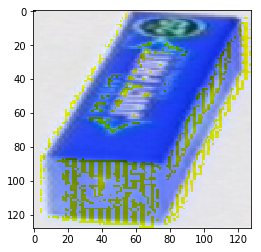

In [8]:
# Visualize images (safety check that conversion helped)
import matplotlib.image as mpimg

filelist = glob.glob('../data/coil-100/*.png')
for i, filename in enumerate(filelist):  
    if i == 15:
        im = mpimg.imread(filename)
        #im = imread(filename)
        #im = Image.open(filename)
        #print(im)
        plt.imshow(im)
        #plt.show()
        #feature_vectors.append(im.flatten())

In [ ]:
exit

In [2]:
# LOAD DATASET:
dataset = STL10()

Files already downloaded and verified


In [3]:
# SPLIT DATASET:
val_size = 0.2
batch_size = 64

train_loader, validation_loader, test_loader = split_dataset(dataset, val_size, batch_size)


In [4]:
# CHOOSE SPLIT:
dataloader = test_loader #validation_loader 

In [5]:
dataset.data[0].shape

(3, 96, 96)

In [6]:
#stl10 util functions:

def get_image(images):
    images = np.transpose(images, (0, 2, 3, 1))
    return images

def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

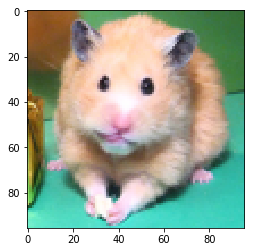

In [7]:
# inspect batch samples:

for index, batch in enumerate(dataloader):
    if index == 47:
        images_norm = dataset.inverse_normalization(batch[0]) 
        images = get_image(images_norm)
        plot_image(images[0])
        break

# Adjusted visualization notebook for stl10 requirements up to here for now

In [210]:
def get_latent_space(model, dataloader):
        
    #ensure that seed is correct (despite several function calls)
    torch.manual_seed(42)
    
    full_latent_space = []
    all_labels = []

    for index, batch in enumerate(dataloader):
        image, label = batch
        #latent, reconst = model(image)
        latent = model.encode(image)
        reconst = model.decode(latent)

        latent = latent.detach().numpy()        
        reconst = reconst.detach().numpy()
        latent_flat = latent.reshape(-1, latent.shape[0]).T
        
        full_latent_space.append(latent_flat)
        all_labels.append(label)

        #if index == 199:
        #    break

    full_latent_space = np.concatenate(full_latent_space, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    return [full_latent_space, all_labels]

In [211]:
#Extract full data space for baseline t-sne:
full_data_space = []
all_labels = []
torch.manual_seed(42)
for index, batch in enumerate(dataloader):
    image, label = batch
    im = image.detach().numpy()
    im_flat = im.reshape(-1, im.shape[0]).T
    full_data_space.append(im_flat)
    all_labels.append(label)
    #if index == 50:
    #    break
    
full_data_space = np.concatenate(full_data_space, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [309]:
# LOAD ALL MODELS AND GET LATENT SPACES
methods = ['topological','vanilla'] #'surrogate'
model_paths = {methods[0]: '../runs/mnist/1/model.pth', #1=10 epochs, 6=50   
                methods[1]: '../runs/mnist/3/model.pth' #3=10 epochs, 5=50
              } #methods[2]: '../runs/mnist/2/model.pth',

latent_spaces = {}

for method in methods:    
    model = torch.load(model_paths[method])
    
    # GET LATENT SPACES:
    Z, _labels = get_latent_space(model, dataloader)
    #ensure that _labels are identical to all_labels, due to seed issues:
    if (all_labels != _labels).sum() > 0:
        raise ValueError('Labels are not consistent! Fix seeds!')
    latent_spaces[method] = {'data': Z, 'labels': _labels}

(array([641.,  10.,  12.,  10.,  14.,   9.,   2.,  12.,  10.,  64.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

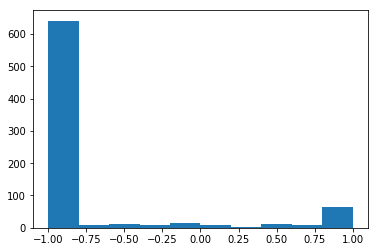

In [297]:
n_samples = 2000

In [298]:
tsne = TSNE(random_state=42, n_iter=2000, perplexity=40) #, perplexity=10, learning_rate=100, early_exaggeration=30)
Z_tsne_top = tsne.fit_transform(latent_spaces['topological']['data'][:n_samples,:])

tsne = TSNE(random_state=42, n_iter=2000, perplexity=40) #, perplexity=10, learning_rate=100)
Z_tsne_van = tsne.fit_transform(latent_spaces['vanilla']['data'][:n_samples,:])

tsne = TSNE(random_state=42, n_iter=2000, perplexity=40) #, perplexity=10, learning_rate=100)
X_tsne = tsne.fit_transform(full_data_space[:n_samples,:])

In [299]:
pca = PCA(random_state=0)
Z_pca_top = pca.fit_transform(latent_spaces['topological']['data'][:n_samples,:])
pca = PCA(random_state=0)
Z_pca_van = pca.fit_transform(latent_spaces['vanilla']['data'][:n_samples,:])
pca = PCA(random_state=0)
X_pca = pca.fit_transform(full_data_space[:n_samples,:])

In [300]:
def plotting(transformed, all_labels, title):
    color_mapping = matplotlib.cm.rainbow(np.linspace(0, 1, 10))
    distinct_labels = np.unique(all_labels)
    colors = [color_mapping[cl] for cl in distinct_labels]
    for i, label in enumerate(distinct_labels):
        mask = (all_labels == label).astype(int)
        inds = list(np.where(mask)[0])
        plt.scatter(transformed[inds, 0], transformed[inds, 1], c=[colors[i]], label=label, s=2)
    plt.title(title)
    lgnd = plt.legend(loc="lower left")
    for i,_ in enumerate(distinct_labels):
        lgnd.legendHandles[i]._sizes = [30]

In [301]:
#shuff_labels = all_labels.copy()
#np.random.shuffle(shuff_labels)

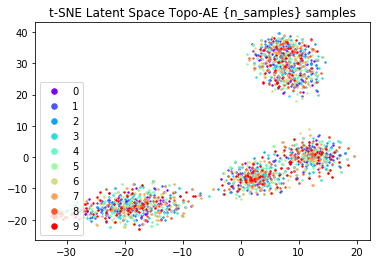

In [308]:
plotting(Z_tsne_top, all_labels[:n_samples], 't-SNE Latent Space Topo-AE {n_samples} samples')


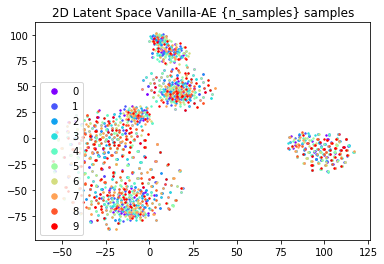

In [303]:
plotting(Z_tsne_van, all_labels[:n_samples], '2D Latent Space Vanilla-AE {n_samples} samples')

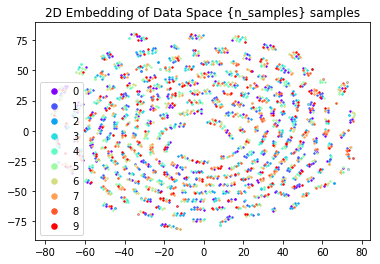

In [304]:
plotting(X_tsne, all_labels[:n_samples], '2D Embedding of Data Space {n_samples} samples')

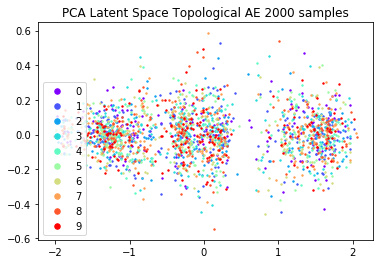

In [305]:
plotting(Z_pca_top, all_labels[:n_samples], f'PCA Latent Space Topological AE {n_samples} samples')

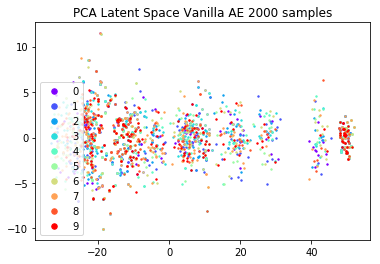

In [306]:
plotting(Z_pca_van, all_labels[:n_samples], f'PCA Latent Space Vanilla AE {n_samples} samples')

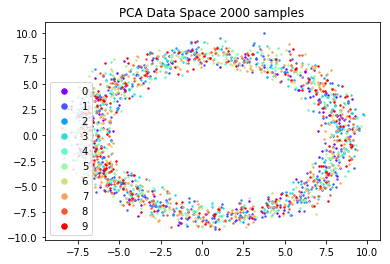

In [307]:
plotting(X_pca, all_labels[:n_samples], f'PCA Data Space {n_samples} samples')

# BELOW HERE IS OLDER STUFF


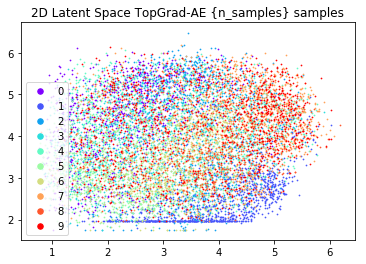

In [15]:
plotting(top_latent_space[:n_samples,:], grad_top_labels[:n_samples], '2D Latent Space TopGrad-AE {n_samples} samples')

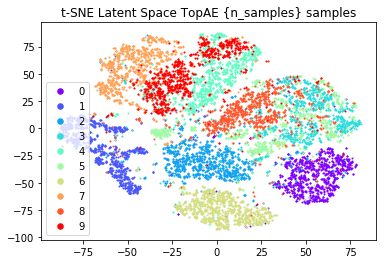

In [89]:
plotting(Z_tsne_top, top_labels[:n_samples], 't-SNE Latent Space TopAE {n_samples} samples')

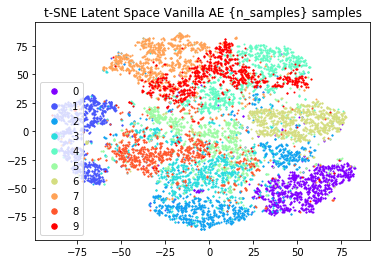

In [90]:
plotting(Z_tsne_van, van_labels[:n_samples], 't-SNE Latent Space Vanilla AE {n_samples} samples')

In [ ]:
mds = MDS(n_components=2)
Z_mds_top = mds.fit_transform(top_latent_space[:n_samples,:])
mds = MDS(n_components=2)
Z_mds_van = mds.fit_transform(vanilla_latent_space[:n_samples,:])

In [ ]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(full_data_space[:n_samples,:])

In [ ]:
isomap = Isomap(n_components=2)
Z_isomap = isomap.fit_transform(X[:100])

In [27]:
kpca = KernelPCA(kernel="rbf", gamma=1)
Z_kpca = kpca.fit_transform(full_latent_space[:n_samples,:])



In [ ]:
plotting(Z_mds_top, top_labels[:n_samples], f'MDS Latent Space Topological AE {n_samples} samples')

In [ ]:
plotting(Z_mds_van, van_labels[:n_samples], f'MDS Latent Space Vanilla AE {n_samples} samples')

In [ ]:
plotting(X_mds, all_labels[:n_samples], f'MDS Data Space {n_samples} samples')